In [ ]:
#1. Identify and Extract Actionable Insights

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
#Load a DataSet

In [3]:
data = pd.read_csv('DSINTERN 1.csv')

In [5]:
# Combine subject and discription
data['text'] = data['subject'].fillna('') + " " + data['Description'].fillna('')


In [7]:
# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)

In [9]:
# Apply preprocessing
nltk.download('stopwords')
data['clean_text'] = data['text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
# Extract most common keywords
vectorizer = CountVectorizer(max_features=10)
X = vectorizer.fit_transform(data['clean_text'])
keywords = vectorizer.get_feature_names_out()

In [13]:
print("Top keywords:", keywords)

Top keywords: ['de' 'en' 'es' 'ich' 'issue' 'la' 'nicht' 'support' 'team' 'und']


In [ ]:
#2. Group Similar Data Points

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [17]:
# Convert text to numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=100)
X = tfidf_vectorizer.fit_transform(data['clean_text'])

In [19]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

In [21]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X.toarray())

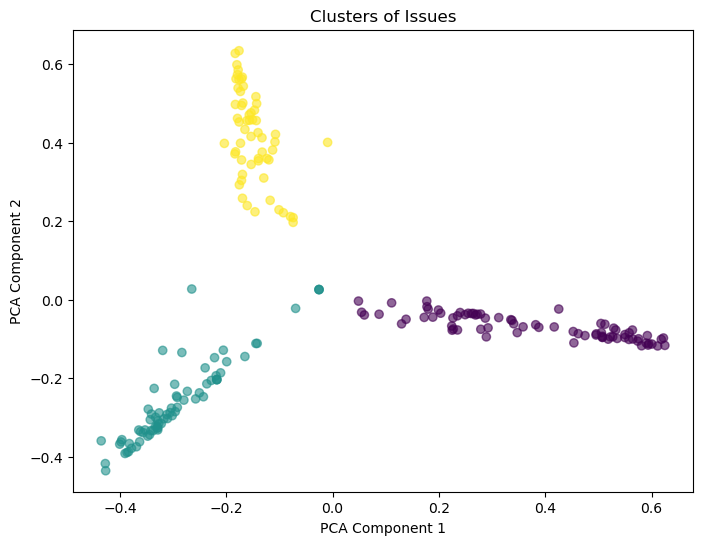

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.title("Clusters of Issues")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [ ]:
#3. Develop a Classification Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [27]:
# Filter rows with non-null priority values
data = data[data['priority'].notnull()]

In [29]:
# Convert priority to integers
data['priority'] = data['priority'].astype(int)

In [31]:
# Prepare input (features) and output (target)
X = tfidf_vectorizer.transform(data['clean_text'])
y = data['priority']

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.38      0.43      0.40         7
           2       0.29      0.31      0.30        13
           3       0.71      0.63      0.67        19

    accuracy                           0.49        39
   macro avg       0.46      0.46      0.45        39
weighted avg       0.51      0.49      0.50        39

